# Implementacion de un filtro trapezoidal


Aqui ira la teoria y las ecuaciones de diseño del filtro
.
.
.

refferencias:

- Improvement in Trapezoidal Pulse Shaping Pile-Up in Nuclear Signal Processing
- VHDL Simulation of Trapezoidal Filter for Digital Nuclear Spectroscopy systems


### Conformacion de las señales exponenciales de eventos

Tipicamente los eventos de interaccion nuclear generan una señal del tipo exponencial la cual desea ser representada por el filtro trapezoidal, 

A continuacion se construira la señal a ser evaluada

![image](images/img4.png)

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import lfilter, firwin, freqz

![image](images/img6.jpg)

- Ecuacion en el continuo
$$X_{amp} = \frac{Q}{Cf}e^{-\frac{t}{\tau}}u(t)$$

- Ecuacion discreta
$$X_{amp} = \frac{Q}{Cf}\frac{1}{1-d z^{-1}}$$

In [2]:
Q = 1  # Carga del detector
Cf = 1 # Capacitancia del detector
tao = 1/5 # constante de tiempo en segundos
Ts = 0.001 # Periodo de muestreo
N = 1/Ts

t = np.arange(0,10,Ts)
delay = 5

In [3]:
def x_amp(A, delay):
    return A*(Q/Cf)*np.exp(-((t-delay)/tao))*np.heaviside(t-delay, 1)

In [4]:
x = x_amp(1,delay)

<function matplotlib.pyplot.show(close=None, block=None)>

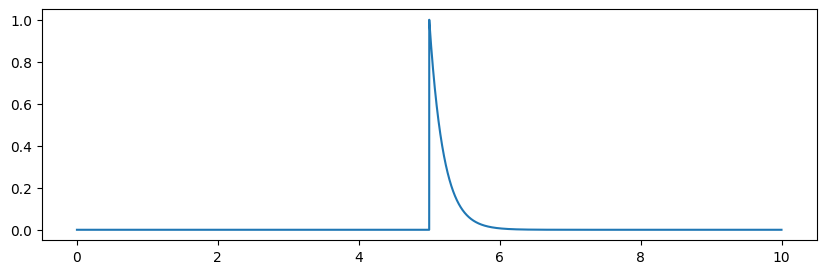

In [5]:
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

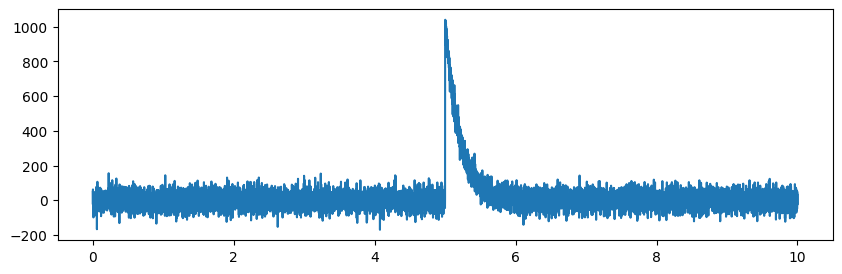

In [6]:
x_noise = (x + 0.04*np.random.randn(len(t))) * 2**10

plt.figure(figsize=(10,3))
plt.plot(t,x_noise)
plt.show

## Implementacion del filtro trapezoidal

In [7]:
K = 500
L = 750
M = 2100

In [8]:
def traps(x):
    y = np.zeros(len(x))
    b = np.zeros(len(x))
    for n in range((K+L),len(x)):
        A = x[n] - x[n-K] - x[n-L] + x[n-K-L]
        b[n] = b[n-1] + A
        C = b[n] + A*M
        
        y[n] = y[n-1] + C

    return y

<function matplotlib.pyplot.show(close=None, block=None)>

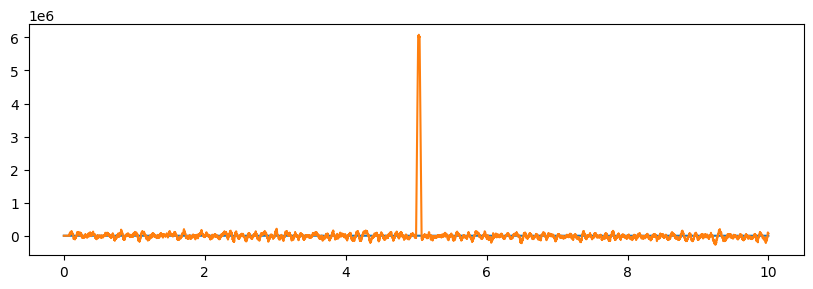

In [33]:
K = 29
L = 50
M = 200

y = traps(x_noise)
plt.figure(figsize=(10,3))
plt.plot(t,x_noise)
plt.plot(t,y)
plt.show

Ejemplo cn multiples pulsos

<function matplotlib.pyplot.show(close=None, block=None)>

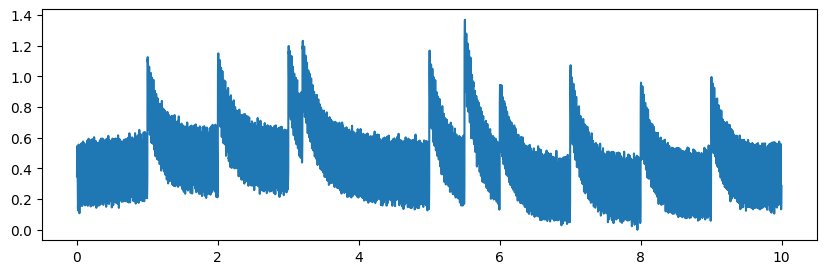

In [26]:
x = x_amp(0.5,1) + x_amp(0.5,2) + x_amp(0.55,3) + x_amp(0.4,3.2) + x_amp(0.6,5) + x_amp(0.8,5.5)+ x_amp(0.4,6)+ x_amp(0.6,7)+ x_amp(0.5,8)+ x_amp(0.5,9)
x = x + 0.2* np.sin(100*np.pi*t)
x = x + 0.1* np.sin(0.2*np.pi*t)
x = x + 0.02*np.random.randn(len(t)) 
x = x + np.abs(np.min(x))

plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.show
    

In [27]:
data = np.round(x * 2**10).astype(int)
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

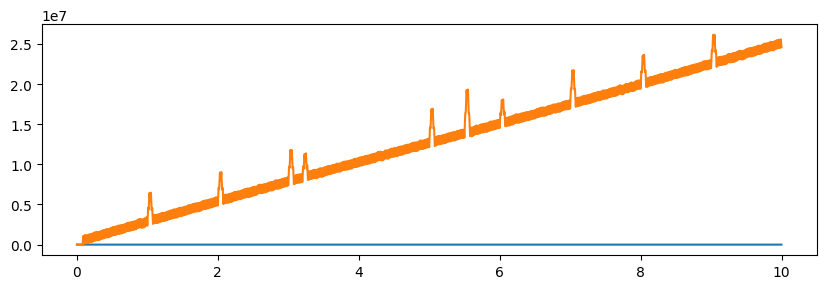

In [28]:
y = traps(data)
plt.figure(figsize=(10,3))
plt.plot(t,x)
plt.plot(t,y)
plt.show

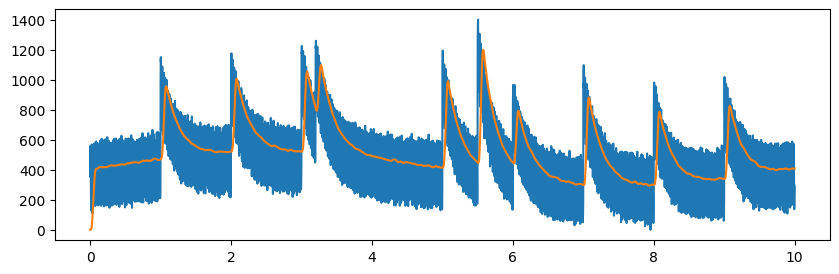

In [30]:
# Use firwin with a Kaiser window to create a lowpass FIR filter.
#taps = firwin(100, [30/(2*N), 100/(2*N)], window='hann', pass_zero='bandpass')
taps = firwin(100, [10/(2*N), 30/(2*N)], window='hann', pass_zero='bandpass')

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, data)

plt.figure(figsize=(10,3))
plt.plot(t,data)
plt.plot(t,filtered_x)
plt.show

coefs = np.round(taps * 2**10).astype(int)
df = pd.DataFrame(coefs)
df.to_csv('coefs.csv', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

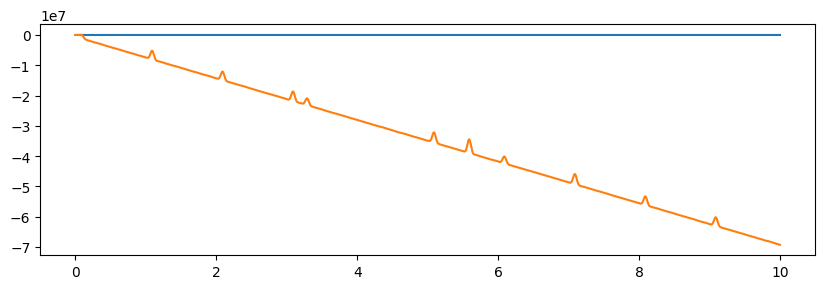

In [22]:
K = 29
L = 50
M = 200

y = traps(filtered_x)
plt.figure(figsize=(10,3))
plt.plot(t,filtered_x)
plt.plot(t,y)
plt.show

![image](images/img5.png)

![image](images/im3.jpeg)
![image](images/im2.jpeg)
![image](images/im1.jpeg)